# **Statistics Warmup : solutions notebook**

The Statistics course at the PSI 2022 school has 2 components:
a. lecture notes with "theory" explanations
b. jupyter notebooks with some "hands-on" exercises

This first notebook focuses on introductory topics that will not be covered in detail in the course:
1. numpy/scipy/matplotlib basics
2. Means, variance and covariance
3. Quantiles of the normal distribution
4. Generating data
5. The Poisson distribution
6. Histograms and chi2

It presents some explanations followed by exercises (highlighted in $\mathbf{\color{red}{\text{red}}}$)

## 1. Basics

The notebooks accompanying the lectures will make use of the `numpy`/`scipy`/`matplotlib` stack. It's also possible to implement these examples with other tools such as `root`, for those who are more familiar with it and have it installed. We'll go with `numpy`/`scipy`/`matplotlib` which has the advantage of being more widely available, and easy to run in tools such as `binder`, but feel free to use other implementations if you like.

To start with, we need to import the relevant python packages:

In [1]:
import numpy as np  # handles most of the numerical work
import scipy.stats  # implements statistical tools (PDFs, etc)
from matplotlib import pyplot as plt # for plotting

numpy handles most of the underlying work. In particular operations will usually be performed on numpy arrays -- arrays of floats similar to python lists.
For instance we can generate some events as follows:

In [2]:
yvals = np.random.normal(3.0, 1.0, 10) # generate 10 events from a Gaussian(mean=3, sigma=1) distribution
print(yvals)

[3.25447483 2.43194299 4.87090993 3.19509991 2.1847513  1.75703046
 3.25618379 2.66762767 4.11515812 2.67251378]


The `scipy` package has some useful features like fully-featured PDF implementations, and `matplotlib` will be used for inline plots. As an example of how things work, we can draw a few Gaussian curves: 

In [3]:
xvals = np.linspace(-5,5,100) # an array of 100 points between -5 and 5 which will be used for plotting
means = [0.0, 1.0, -2.0]   # a few mean values to plot

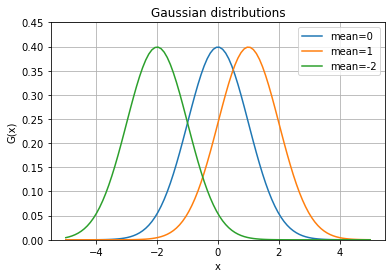

In [4]:
# Note that plt.plot takes 2 arrays, one array of x values and an array of y values.
# norm.pdf is a scalar function, which normally applies to a single x value and returns the value of
# the normal PDF at x. However it can be applied to lists as well, and will return the list of PDF values:
# norm.pdf([x1, x2]) = [norm.pdf(x1), norm.pdf(x2)]

for mean in means:
    yvals = [ scipy.stats.norm.pdf(xval, loc=mean, scale=1) for xval in xvals ] # compute the y-values for each x
    plt.plot(xvals, yvals, label='mean=%g' % mean) # draw the plots

plt.ylim(0,0.45)   # adjust the y range
plt.grid(True)     # draw grid lines on the plot
plt.xlabel('x')
plt.ylabel('G(x)')
plt.title('Gaussian distributions')
plt.legend();

Now repeat with different widths :

In [5]:
sigmas = [1.0, 2.0, 3.0]   # a few sigma values to plot

$\mathbf{\color{red}{\rightarrow\text{Now draw the corresponding plots by completing the code below}}}$

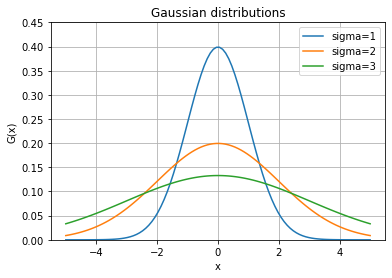

In [6]:
for sigma in sigmas:
    yvals = [ scipy.stats.norm.pdf(xval, scale=sigma) for xval in xvals ]
    plt.plot(xvals, yvals, label='sigma=%g' % sigma)
plt.ylim(0,0.45)   # adjust the y range
plt.grid(True)     # draw grid lines on the plot
plt.xlabel('x')
plt.ylabel('G(x)')
plt.title('Gaussian distributions')
plt.legend();

One can also generate random datasets and plot the result:

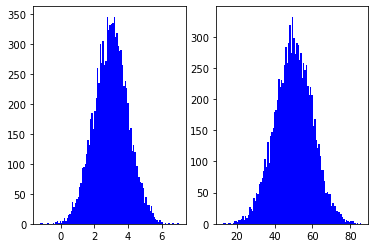

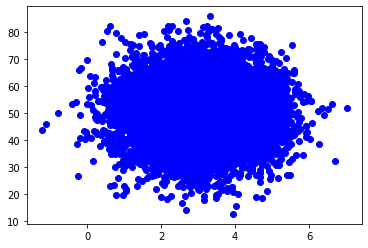

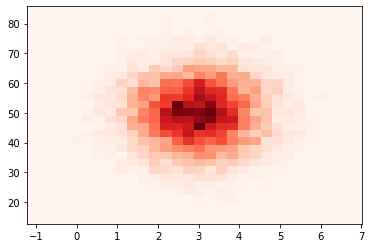

In [7]:
# generate two random variables
xvals = np.random.normal(3.0, 1.0, 10000)
yvals = np.random.normal(50.0, 10.0, 10000)

plt.subplot(121)
plt.hist(xvals, bins=100, color='b')
plt.subplot(122)
plt.hist(yvals, bins=100, color='b')
plt.figure()
plt.scatter(xvals,yvals, color='b')
plt.figure()
plt.hist2d(xvals, yvals, (30, 30), cmap='Reds');

Now we can compute some sample means, variances and covariances:

In [8]:
mean_x = np.sum(xvals)/len(xvals)
mean_y = np.sum(yvals)/len(xvals)
print('sample means:', mean_x, mean_y)

sample means: 2.991542872530144 50.04795666507045


$\mathbf{\color{red}{\rightarrow\text{Now compute the variance, covariance and correlation coefficient of x and y in the same way using np.sum()}}}$

In [9]:
mean_x = np.sum(xvals)/len(xvals)
mean_y = np.sum(yvals)/len(xvals)
print('sample means:', mean_x, mean_y)

var_x = np.sum((xvals - mean_x)**2)/(len(xvals) - 1)
var_y = np.sum((yvals - mean_y)**2)/(len(xvals) - 1)
print('sample variances:', var_x, var_y)
print('sample RMSs:', np.sqrt(var_x), np.sqrt(var_y))
cov_xy = np.sum((xvals - mean_x)*(yvals - mean_y))/(len(xvals) - 1)
cor_xy = cov_xy/np.sqrt(var_x*var_y)
print('sample covariance and correlation coefficient:', cov_xy, cor_xy)

sample means: 2.991542872530144 50.04795666507045
sample variances: 1.013823640200569 99.35024356740168
sample RMSs: 1.0068880971590481 9.967459233295196
sample covariance and correlation coefficient: -0.006257388152587347 -0.0006234870257181818


This can also be done more simply using numpy internal functions:

In [10]:
print('sample means:', np.mean(xvals), np.mean(yvals))
print('sample variances:', np.var(xvals, ddof=1), np.var(yvals, ddof=1))
print('sample covariance and correlation coefficient:', np.cov(xvals, xvals, ddof=1)[0,1], np.corrcoef(xvals,yvals)[0,1])


sample means: 2.991542872530144 50.04795666507045
sample variances: 1.013823640200569 99.35024356740168
sample covariance and correlation coefficient: 1.0138236402005685 -0.0006234870257181862


Note that the covariance and correlations coefficient should really be zero, the non-zero value here is due to fluctuations. For a case with real correlation, one can do

In [11]:
zvals = 5*xvals + yvals

$\mathbf{\color{red}{\rightarrow\text{Now plot z vs. x and compute the covariance and correlation coefficient of x and z}}}$

sample covariance and correlation coefficient of (x, 5x+y): 5.062860812850259 0.45039939911976046


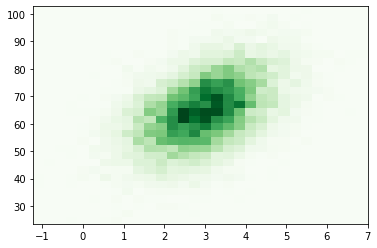

In [12]:
plt.hist2d(xvals,zvals, (30,30), cmap='Greens')
print('sample covariance and correlation coefficient of (x, 5x+y):', np.cov(xvals, zvals, ddof=1)[0,1], np.corrcoef(xvals,zvals)[0,1])

## 2. Gaussian quantiles

The *quantiles* of a PDF are the fraction of its integral within a given range of its variable. The quantiles of the normal distribution $N(x) = G(x; x_0=0,\sigma=1)$ play an important role since they are used to define some important quantities later ($1\sigma$ and $1\sigma$ errors, $5\sigma$ discovery, etc.). 

One defines the cumulative distribution function of normal as $\Phi(x) = \int\limits_{-\infty}^x N(t) dt$, and a two-sided version can also be defined as $\Phi(x, y) = \int\limits_x^y N(t) dt$

They are easy to compute using the scipy tools:

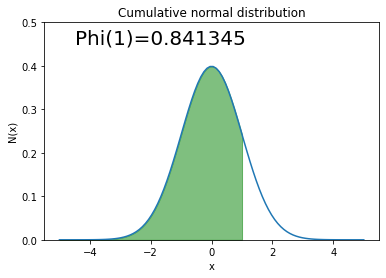

In [13]:
# Draw a normal distribution as before
xvals = np.linspace(-5,5,100)
yvals = [ scipy.stats.norm.pdf(xval) for xval in xvals ]
fig = plt.figure()
plt.plot(xvals, yvals)
plt.ylim(0,0.5)
plt.title("Cumulative normal distribution")
plt.xlabel('x')
plt.ylabel('N(x)')

# Now fill in part of the distribution and print the integral
up = 1
shaded_xvals = np.linspace(-5,up,100)
shaded_yvals = [ scipy.stats.norm.pdf(xval) for xval in shaded_xvals ]
plt.fill_between(shaded_xvals, shaded_yvals, alpha=0.5, color='g')
plt.text(-4.5, 0.45, 'Phi(%g)=%g' % (up, scipy.stats.norm.cdf(up)), fontsize=20);

This form is normally referred to as a *one-sided* quantile. Two-sided quantiles apply the boundary on both sides:

$\mathbf{\color{red}{\rightarrow\text{Now draw and compute the *two-sided* 1-sigma quantile (from -1 to +1) [Feel free to copy-and-paste the code above!}}}$ 

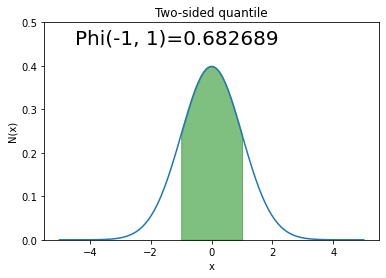

In [14]:
# Draw a normal distribution as before
fig = plt.figure()
plt.plot(xvals, scipy.stats.norm.pdf(xvals)) # Can use the function(xvals) syntax for simplicity, same as [ function(xval) for xval in xvals ]
plt.ylim(0,0.5)
plt.title("Two-sided quantile")
plt.xlabel('x')
plt.ylabel('N(x)')

up = 1
shaded_xvals = np.linspace(-up,up,100)
plt.fill_between(shaded_xvals, scipy.stats.norm.pdf(shaded_xvals), alpha=0.5, color='g')
plt.text(-4.5, 0.45, 'Phi(-%g, %g)=%g' % (up, up, scipy.stats.norm.cdf(up) - scipy.stats.norm.cdf(-up)), fontsize=20);

Now let's plot some quantiles for different values of the bounds. As we'll see, the tail integrals (a.k.a the *survival function*, corresponding to the unshaded areas above) are also useful, so compute all of the following:

In [15]:
bounds = [0, 1, 2, 3, 4, 5]
one_sided = [ scipy.stats.norm.cdf(up) for up in bounds ]
one_sided_tail = [ scipy.stats.norm.sf(up) for up in bounds ]

$\mathbf{\color{red}{\rightarrow\text{Compute the two-sided integrals for each value of "bounds"}}}$ 

In [16]:
two_sided = [ scipy.stats.norm.cdf(up) - scipy.stats.norm.cdf(-up) for up in bounds ]
two_sided_tail = [ scipy.stats.norm.sf(up) + scipy.stats.norm.cdf(-up) for up in bounds ]

# Pretty-print the result
import pandas as pd
import jinja2
labels = [ 'Bound', '1-sided', '1-tail', '2-sided', '2-tail' ]
data = np.array([ bounds, one_sided, one_sided_tail, two_sided, two_sided_tail ]).T  # uncomment to show the plot
pd.DataFrame(data, columns=labels)                                                   # uncomment to show the plot

,Bound,1-sided,1-tail,2-sided,2-tail
0,0.0,0.500000,5.000000e-01,0.000000,1.000000e+00
1,1.0,0.841345,1.586553e-01,0.682689,3.173105e-01
2,2.0,0.977250,2.275013e-02,0.954500,4.550026e-02
3,3.0,0.998650,1.349898e-03,0.997300,2.699796e-03
4,4.0,0.999968,3.167124e-05,0.999937,6.334248e-05
5,5.0,1.000000,2.866516e-07,0.999999,5.733031e-07


## 3. Poisson distributions and the Central-limit theorem

First let's get acquainted with Poisson distributions. As explained in the lecture, they are critical to describe counting processes, and become progressively more Gaussian with increasing event rates, so we can check a few rate hypotheses:

,Rate,Mean,Variance
0,0.1,0.1,0.1
1,1.0,1.0,1.0
2,3.0,3.0,3.0
3,10.0,10.0,10.0


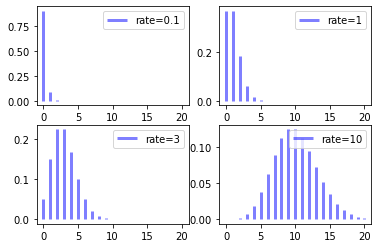

In [17]:
xvals = np.linspace(0, 20, 21)
rates = [ 0.1, 1, 3, 10 ]

for i, rate in enumerate(rates) :
  plt.subplot(221 + i)
  plt.vlines(xvals, 0, scipy.stats.poisson.pmf(xvals, rate), colors='b', lw=3, alpha=0.5, label='rate=%g' % rate)
  plt.legend()

means     = [ scipy.stats.poisson.stats(mu=rate, moments='m') for rate in rates ]
variances = [  scipy.stats.poisson.stats(mu=rate, moments='v')  for rate in rates ]
pd.DataFrame(np.array([ rates, means, variances]).T, columns=[ 'Rate', 'Mean', 'Variance' ])

In [18]:
nexp = 10000
nterms = [ 1, 2, 3, 5, 10, 100 ]

$\mathbf{\color{red}{\rightarrow\text{Exercise: check the central limit theorem by drawing Poisson events:}}}$
- For $nterms=1$, draw $nexp=10000$ $Poisson(1)$ events (`n = np.random.poisson(1)`) and histogram them
- For $nterms=2$, draw pairs of $Poisson(1)$ events and histogram their averages
- Repeat for the $nterms$ values provided above, to get increasingly Gaussian distributions

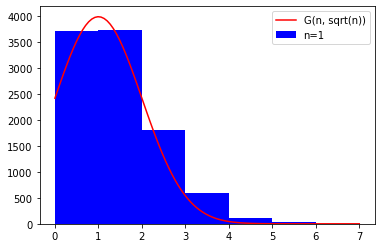

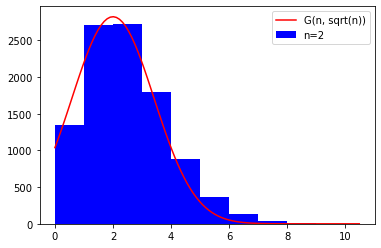

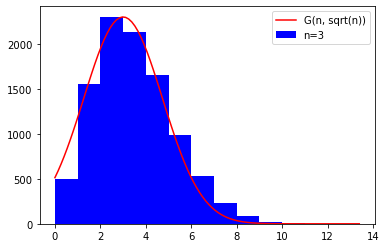

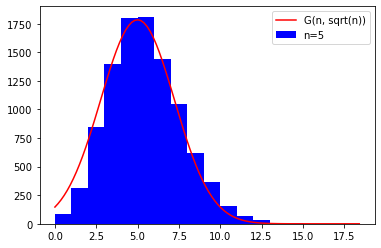

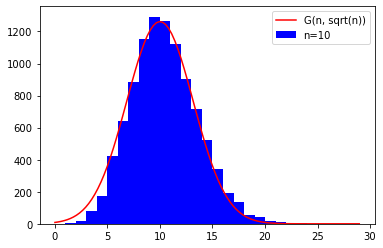

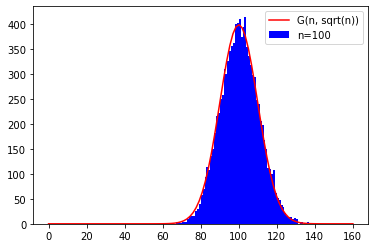

In [19]:
for nterm in nterms :
  plt.figure()
  data = [ sum([ np.random.poisson(1) for i in range(0, nterm) ]) for k in range(0, nexp) ]
  range_max =  nterm + 6*np.sqrt(nterm)
  plt.hist(data, bins=np.arange(0, range_max, 1), color='b', label='n=%d' % nterm)
  xvals = np.linspace(0, range_max, 100)
  plt.plot(xvals, nexp*scipy.stats.norm.pdf(xvals, loc=nterm, scale=np.sqrt(nterm)), color='r', label='G(n, sqrt(n))' )
  plt.legend();

As expected, the distribution becomes more Gaussian as we increase the number of terms, with a variance that grows as $\sqrt n$.

## 4. Histograms and the $\chi^2$ test


We consider a 20-bin histogram of data over $[0,1]$, which we assume is coming from a linear distribution, $f(x) \propto (1 - x/2)$. We also assume that we have a histogram of data, and would like to decide whether the data is compatible with the assumed linear distribution. 

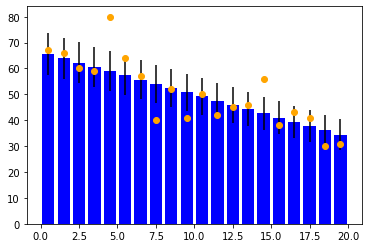

In [20]:
nbins = 20
nevts = 1000
np.random.seed(0)
xvals = np.linspace(0.5, nbins - 0.5, nbins)
expected_yields = np.array([ (1 - i/2/nbins) for i in range(0, nbins) ])
expected_yields *= nevts/np.sum(expected_yields)
dataset = [ np.random.poisson(y) for y in expected_yields ]
plt.figure()
plt.bar(xvals, expected_yields, yerr=np.sqrt(expected_yields), color='b')
plt.scatter(xvals, dataset, color='orange', zorder=10)

$\mathbf{\color{red}{\text{Exercise: compute chi2 values}}}$
- Compute the chi2 values between the dataset and the expected yields as the sum of `(d - y)/np.sqrt(y)`
- Compute the chi2 p-value using `scipy.stats.chi2.sf(chi2, nbins)`
- Compute the significance for the pvalue using `scipy.stats.norm.isf(pvalue)`

In [24]:
chi2 = sum( [ ((d-y)/np.sqrt(y))**2 for d,y in zip(dataset, expected_yields) ])
pvalue = scipy.stats.chi2.sf(chi2, 20)
print('chi2:', chi2)
print('p(chi2):', pvalue)
print('signif(chi2):', scipy.stats.norm.isf(pvalue))

chi2: 21.20665610969041
p(chi2): 0.38505994102001573
signif(chi2): 0.2922180888374267


The compatibility between the generated dataset the true distribution may be larger or smaller depending on the random fluctuations that were generated, but generally the agreement should be quite good.

One can check that the distribution is doing what it is expected by generating datasets:

In [ ]:
ndata = 10000
all_data = [ [ np.random.poisson(y) for y in expected_yields ] for i in range(0, ndata) ]
all_chi2 = [ scipy.stats.chisquare(data, expected_yields, ddof=-1).statistic for data in all_data ]
bins = np.linspace(0,50,100)
plt.hist(all_chi2, bins=bins, color='b');
plt.plot(bins, scipy.stats.chi2.pdf(bins, 20)*ndata/2, color='orange')

The p-value we have computed above is the tail integral in the distribution above, and we see that it agrees quite well with the generated datasets.

If we now consider a prediction with the opposite slope, this will be generally much worse:

In [ ]:
new_dataset = np.flip(expected_yields)
plt.figure()
plt.bar(xvals, new_dataset, yerr=np.sqrt(new_dataset), color='b')
plt.scatter(xvals, dataset, color='orange', zorder=10)

$\mathbf{\color{red}{\rightarrow\text{Recompute the chi2, chi2 pvalue, and chi2 signifiance for the new dataset}}}$

In [ ]:
chi2_scipy_flip = scipy.stats.chisquare(dataset, new_dataset, ddof=-1)
print('chi2, p(chi2), significance from scipy:', chi2_scipy_flip.statistic, chi2_scipy_flip.pvalue, scipy.stats.norm.isf(chi2_scipy_flip.pvalue))

Finally, one can repeat the whole study with a lower number of events per dataset, e.g. 10 instead of 1000. In this regime, the Poisson distributions in each bin are not Gaussian enough, and the computed $\chi^2$ does not in fact follow a $\chi^2$ distribution. In this case, one needs to move away from the $\chi^2$ formula and use a statistical model than accounts for Poisson effects.

## Addendum: Correlations and correlation coefficients

In [ ]:
a = np.random.uniform(-0.5,0.5,10000)
b = np.random.uniform(-0.5,0.5,10000)
u = (a+b)
v = (a-b)

In [ ]:
plt.scatter(u,v, color='b');

$\mathbf{\color{red}{\rightarrow\text{Compute the correlation coefficient of u and v}}}$

In [ ]:
np.cov(u,v)

In [ ]:
np.corrcoef(u,v)

In [ ]:
np.corrcoef(u,v)[0,1]